# Ahmed Mostafa Attia 

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [2]:

raw_store_df = pd.read_csv('/kaggle/input/rossmann-store-sales/store.csv')
print(f"raw_store_df shape: {raw_store_df.shape}")
raw_store_df

raw_store_df shape: (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [3]:
# Load Train and Test Dataset

raw_train_df = pd.read_csv('/kaggle/input/rossmann-store-sales/train.csv')
raw_test_df = pd.read_csv('/kaggle/input/rossmann-store-sales/test.csv')
print(f"raw_train_df shape: {raw_train_df.shape}")
print(f"raw_test_df shape: {raw_test_df.shape}")

/tmp/ipykernel_33/1867001086.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_train_df = pd.read_csv('/kaggle/input/rossmann-store-sales/train.csv')


raw_train_df shape: (1017209, 9)
raw_test_df shape: (41088, 8)


In [4]:
# Merge store df and train df for better prediction

train_merged_df = raw_train_df.merge(raw_store_df, how='left', on='Store')
train_merged_df = train_merged_df.drop(['PromoInterval'], axis=1)
train_merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN


In [5]:
# Merge store df and test df

test_merged_df = raw_test_df.merge(raw_store_df, how='left', on='Store')
test_merged_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


# Exploratory Data Analysis

In [6]:
# Check weather any null value in the columns

train_merged_df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
dtype: int64

In [7]:
# Check unique value in each column

train_merged_df.nunique()

Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     5
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            654
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 24
Promo2SinceYear                  7
dtype: int64

In [8]:
# There should be 4 unique values but has 5. See Next for Solution!
train_merged_df.StateHoliday.value_counts()

StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [9]:

train_merged_df['StateHoliday'].replace({'0': 0}, inplace=True)
test_merged_df['StateHoliday'].replace({'0': 0}, inplace=True)
train_merged_df.StateHoliday.value_counts()

/tmp/ipykernel_33/1982787158.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_merged_df['StateHoliday'].replace({'0': 0}, inplace=True)
/tmp/ipykernel_33/1982787158.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Sales', ylabel='Count'>

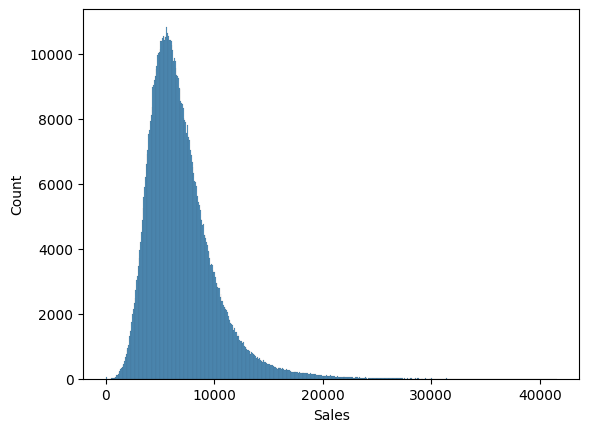

In [10]:


reduced_train_df = train_merged_df[ train_merged_df.Open == 1 ].copy()

sns.histplot(data=reduced_train_df, x='Sales')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Assortment', ylabel='Count'>

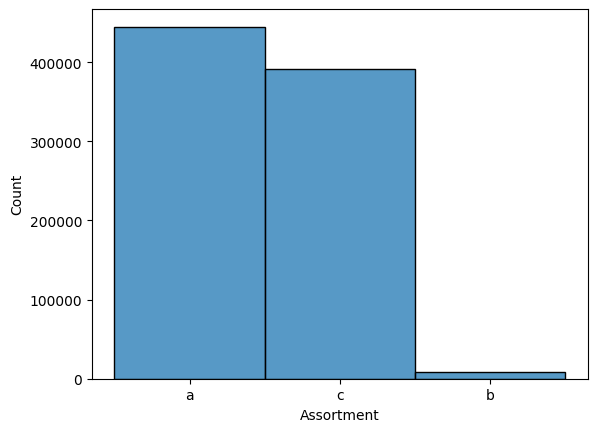

In [11]:
sns.histplot(data=reduced_train_df, x='Assortment')

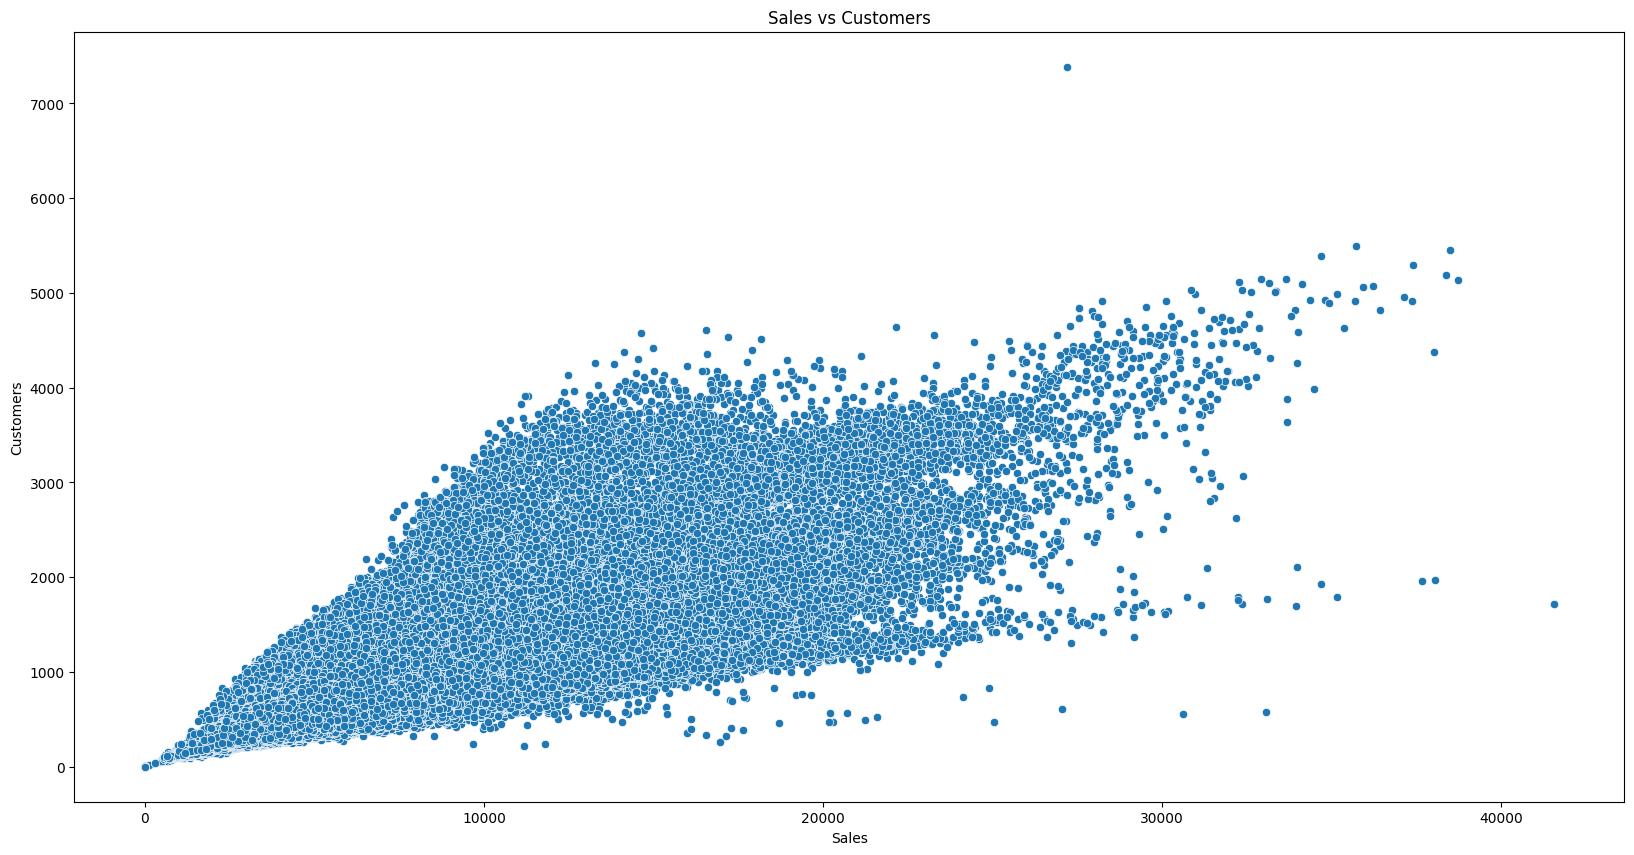

In [13]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x=reduced_train_df.Sales, y=reduced_train_df.Customers)
plt.title("Sales vs Customers")

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

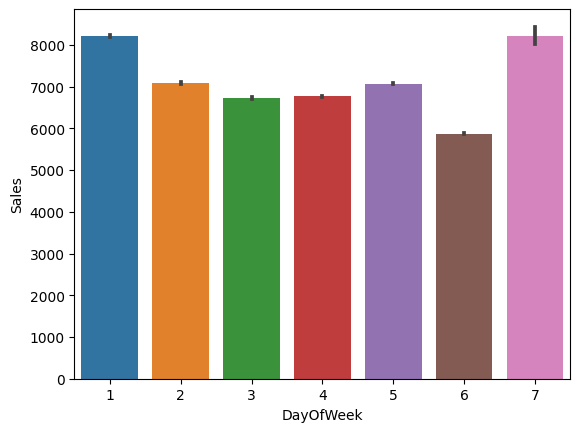

In [14]:
sns.barplot(x=reduced_train_df.DayOfWeek, y=reduced_train_df.Sales)

<Axes: xlabel='StateHoliday', ylabel='Sales'>

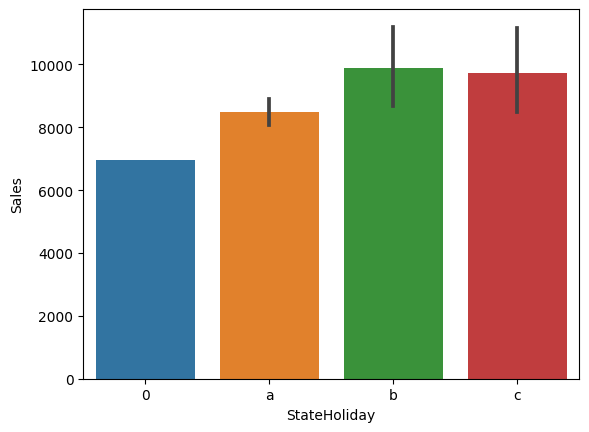

In [14]:
sns.barplot(data=reduced_train_df, x='StateHoliday', y='Sales')

<Axes: xlabel='Assortment', ylabel='Sales'>

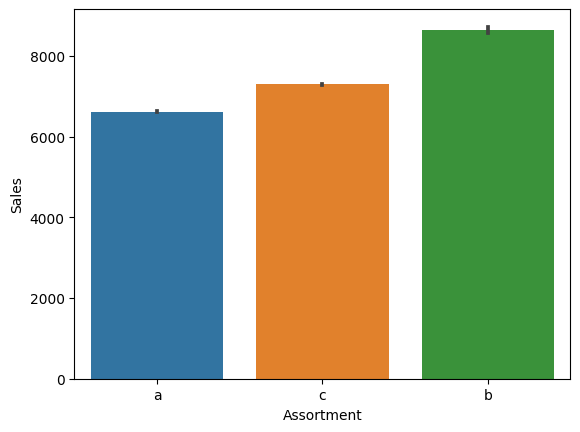

In [15]:
sns.barplot(data=reduced_train_df, x='Assortment', y='Sales')

<Axes: xlabel='StoreType', ylabel='Sales'>

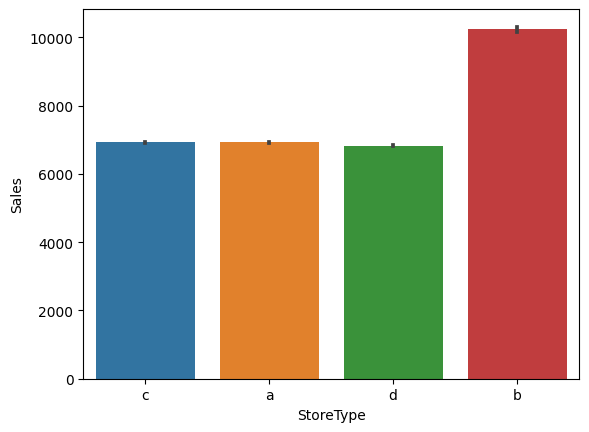

In [16]:
sns.barplot(data=reduced_train_df, x='StoreType', y='Sales')

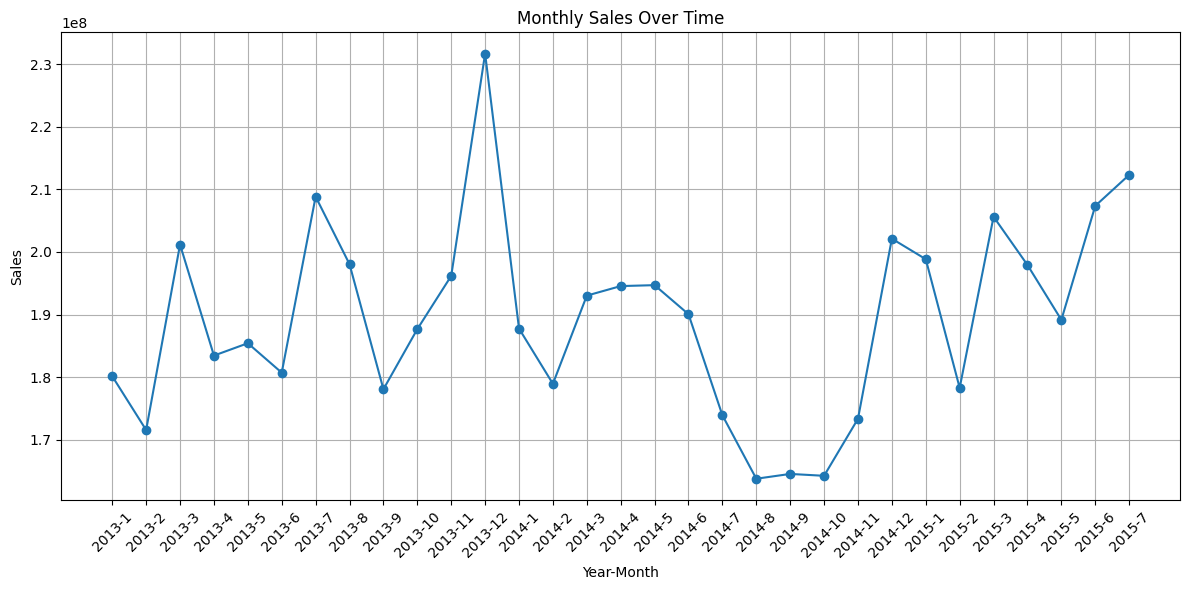

In [30]:
reduced_train_df['Date'] = pd.to_datetime(reduced_train_df['Date'])

reduced_train_df['Year'] = reduced_train_df['Date'].dt.year
reduced_train_df['Month'] = reduced_train_df['Date'].dt.month
reduced_train_df['Day'] = reduced_train_df['Date'].dt.day

monthly_sales = reduced_train_df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str), monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)  
plt.grid(True)
plt.tight_layout()
plt.show()

# Split the Dataset

In [21]:


test_merged_df['Date'] = pd.to_datetime(test_merged_df.Date)

test_merged_df['Year'] = test_merged_df.Date.dt.year
test_merged_df['Month'] = test_merged_df.Date.dt.month
test_merged_df['Day'] = test_merged_df.Date.dt.day

print(f"Estimate Sales from {test_merged_df.Date.dt.date.min()} to {test_merged_df.Date.dt.date.max()}")
test_merged_df

Estimate Sales from 2015-08-01 to 2015-09-17


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,9,17
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN,2015,9,17
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN,2015,9,17
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN,2015,9,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2015,8,1
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2015,8,1
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,2015,8,1
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,2015,8,1


In [22]:
train_df = reduced_train_df[reduced_train_df.Date.dt.year <= 2014]
val_df = reduced_train_df[reduced_train_df.Date.dt.year == 2015]

print(f"Training Shape: {train_df.shape}")
print(f"Validation Shape: {val_df.shape}")
print(f"Test Shape: {test_merged_df.shape}")

Training Shape: (648360, 20)
Validation Shape: (196032, 20)
Test Shape: (41088, 20)


# Data Preprocessing

In [18]:

input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment', 'Promo2', 'Day', 'Month', 'Year']
target_col = 'Sales'

train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_merged_df[input_cols].copy()

num_cols = ['Store', 'DayOfWeek', 'Day', 'Month', 'Year']
cat_cols = ['DayOfWeek', 'Promo', 'StoreType', 'Assortment', 'Promo2']

In [25]:

# train_inputs = pd.get_dummies(train_inputs)
# val_inputs = pd.get_dummies(val_inputs, drop_first=False)
# test_inputs = pd.get_dummies(test_inputs)

# train_inputs = train_inputs.drop(['StateHoliday_b', 'StateHoliday_c'], axis=1)
# val_inputs = val_inputs.drop(['StateHoliday_b'], axis=1)

In [24]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(train_inputs[num_cols])

train_inputs[num_cols] = scaler.transform(train_inputs[num_cols])
val_inputs[num_cols] = scaler.transform(val_inputs[num_cols])
test_inputs[num_cols] = scaler.transform(test_inputs[num_cols])

- ETS Model 

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/tmp/ipykernel_33/1758185707.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=f"{monthly_sales.iloc[-1, 0]}-{monthly_sales.iloc[-1, 1]}", periods=12, freq='M').strftime('%Y-%m'), ets_forecast, label='ETS Forecast', marker='o')


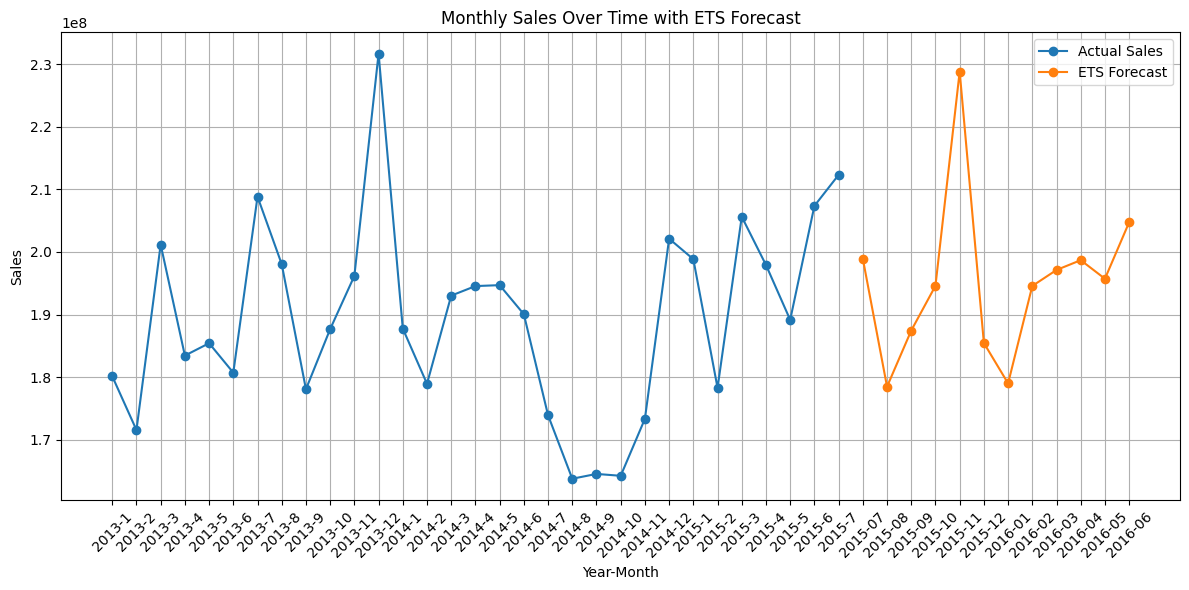

ETS RMSE: 17617664.485356763


In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Fit the model
ets_model = ExponentialSmoothing(monthly_sales['Sales'], trend='add', seasonal='add', seasonal_periods=12)
ets_fit = ets_model.fit()
ets_forecast = ets_fit.forecast(steps=12)  # Forecasting for 12 months ahead

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str), monthly_sales['Sales'], label='Actual Sales', marker='o')
plt.plot(pd.date_range(start=f"{monthly_sales.iloc[-1, 0]}-{monthly_sales.iloc[-1, 1]}", periods=12, freq='M').strftime('%Y-%m'), ets_forecast, label='ETS Forecast', marker='o')
plt.title('Monthly Sales Over Time with ETS Forecast')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluate the model
ets_rmse = mean_squared_error(monthly_sales['Sales'].iloc[-12:], ets_forecast) ** 0.5
print(f'ETS RMSE: {ets_rmse}')

- ARIMA Model

/tmp/ipykernel_33/3526196956.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=f"{monthly_sales.iloc[-1, 0]}-{monthly_sales.iloc[-1, 1]}", periods=12, freq='M').strftime('%Y-%m'), arima_forecast, label='ARIMA Forecast', marker='o')


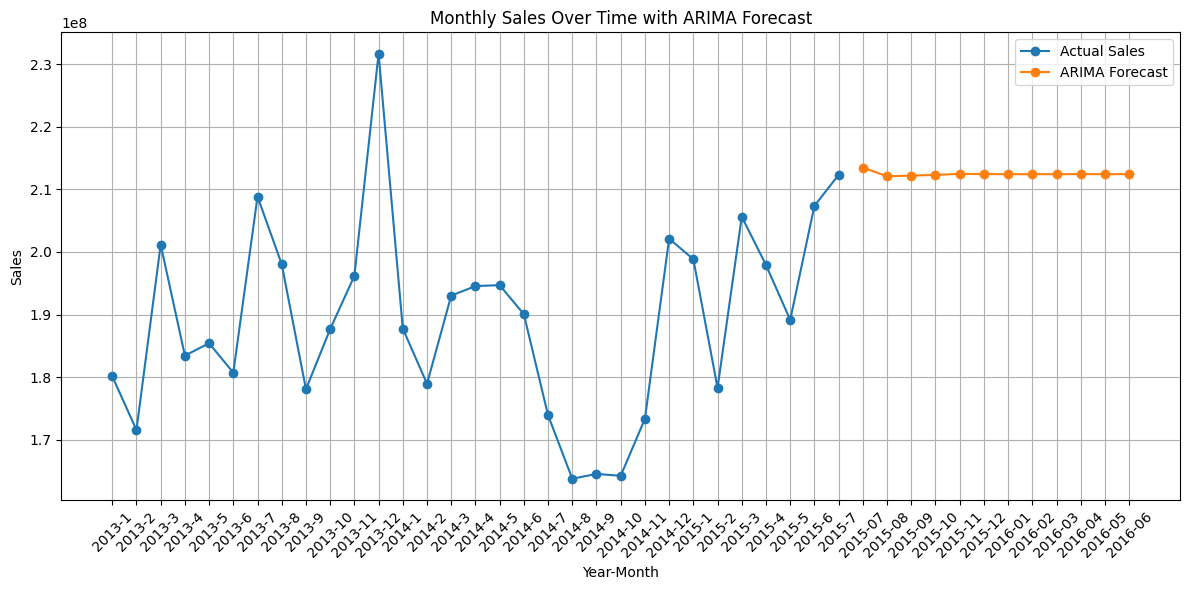

ARIMA RMSE: 30064363.450519584


In [31]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the model
arima_model = ARIMA(monthly_sales['Sales'], order=(5, 1, 0))  # Order can be tuned
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=12)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str), monthly_sales['Sales'], label='Actual Sales', marker='o')
plt.plot(pd.date_range(start=f"{monthly_sales.iloc[-1, 0]}-{monthly_sales.iloc[-1, 1]}", periods=12, freq='M').strftime('%Y-%m'), arima_forecast, label='ARIMA Forecast', marker='o')
plt.title('Monthly Sales Over Time with ARIMA Forecast')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluate the model
arima_rmse = mean_squared_error(monthly_sales['Sales'].iloc[-12:], arima_forecast) ** 0.5
print(f'ARIMA RMSE: {arima_rmse}')

- Prophet Model from Facebook 


14:01:00 - cmdstanpy - INFO - Chain [1] start processing
14:01:00 - cmdstanpy - INFO - Chain [1] done processing
/opt/conda/lib/python3.10/site-packages/prophet/forecaster.py:1796: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.hist

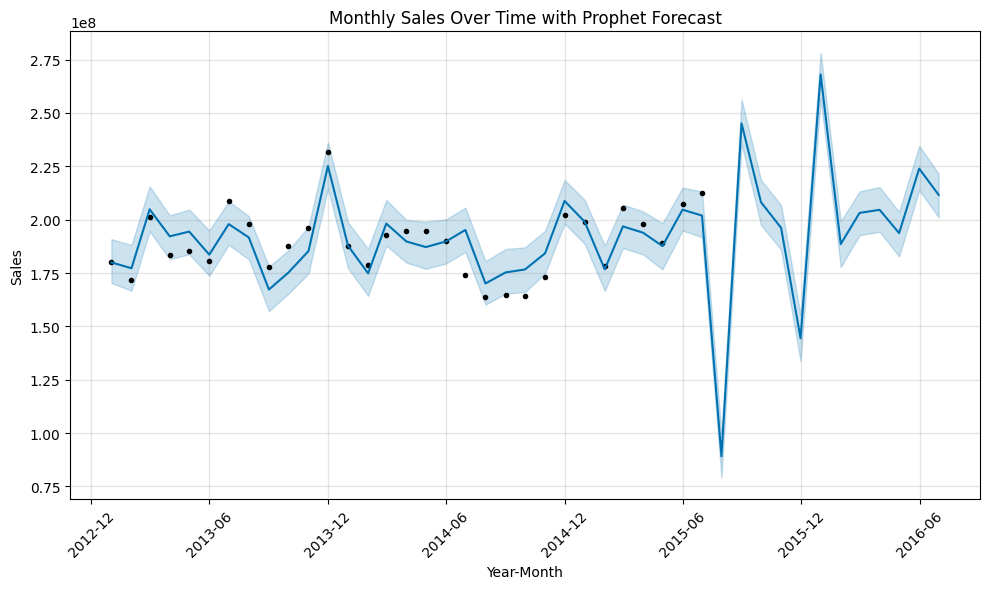

Prophet RMSE: 43844829.548478745


In [33]:
from prophet import Prophet
import pandas as pd

# Preparing the data for Prophet
prophet_df = monthly_sales.rename(columns={'Year': 'ds', 'Sales': 'y'})
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'].astype(str) + '-' + prophet_df['Month'].astype(str))

# Fit the model
prophet_model = Prophet(yearly_seasonality=True, daily_seasonality=False)
prophet_model.fit(prophet_df[['ds', 'y']])

# Forecast
future = prophet_model.make_future_dataframe(periods=12, freq='M')
prophet_forecast = prophet_model.predict(future)

# Plotting
fig = prophet_model.plot(prophet_forecast)
plt.title('Monthly Sales Over Time with Prophet Forecast')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluate the model
prophet_rmse = mean_squared_error(monthly_sales['Sales'].iloc[-12:], prophet_forecast['yhat'].iloc[-12:]) ** 0.5
print(f'Prophet RMSE: {prophet_rmse}')

# XGBOOST

In [37]:


def rmspe(y_true, y_pred):
   
    assert len(y_true) == len(y_pred)
    
    percentage_error = (y_true - y_pred) / y_true
    
    percentage_error[y_true == 0] = 0
    
    squared_percentage_error = percentage_error ** 2
    
    mean_squared_percentage_error = np.mean(squared_percentage_error)
    
    rmspe = np.sqrt(mean_squared_percentage_error)
    
    return rmspe 

In [38]:

def try_model(model):
    model.fit(train_inputs, train_targets)

    train_preds = model.predict(train_inputs)
    val_preds = model.predict(val_inputs)

    # Get RMSE
    train_rmse = np.round(mean_squared_error(train_targets, train_preds, squared=False), 5)
    val_rmse = np.round(mean_squared_error(val_targets, val_preds, squared=False), 5)

    # Get RMSPE
    train_rmspe = np.round(rmspe(train_targets, train_preds), 5)
    val_rmspe = np.round(rmspe(val_targets, val_preds), 5)


    print(f"Train RMSE: {train_rmse}")
    print(f"Val RMSE: {val_rmse}")
    print()
    print(f"Train RMSPE: {train_rmspe}")
    print(f"Val RMSPE: {val_rmspe}")

    return model

In [39]:
        
def get_mean(input):
    return np.full(len(input), reduced_train_df.Sales.mean())

dum_train_preds = get_mean(train_df)
dum_val_preds = get_mean(val_df)

from sklearn.metrics import mean_squared_error

# Get root mean squared error
dum_train_eval = mean_squared_error(dum_train_preds, train_targets, squared=False)
dum_val_eval = mean_squared_error(dum_val_preds, val_targets, squared=False)

train_rmspe = rmspe(dum_train_preds, train_targets)
val_rmspe = rmspe(dum_val_preds, val_targets)

print(f"train_rmse: {dum_train_eval}")
print(f"val_rmse: {dum_val_eval}")
print()
print(f"train_rmspe: {train_rmspe}")
print(f"val_rmspe: {val_rmspe}")
      

train_rmse: 3124.212911034433
val_rmse: 3037.1262166880488

train_rmspe: 0.44917065517162236
val_rmspe: 0.4366501296280081


### Linear Regression as a Baseline Model

In [40]:
logit_model = LinearRegression()
try_model(logit_model)

Train RMSE: 2787.21412
Val RMSE: 2694.62097

Train RMSPE: 0.53816
Val RMSPE: 0.47802


LinearRegression()

### Decision Tree Regressor

In [41]:
decision_tree_model = DecisionTreeRegressor(random_state=42)
try_model(decision_tree_model)

Train RMSE: 0.0
Val RMSE: 1380.17354

Train RMSPE: 0.0
Val RMSPE: 0.21355


DecisionTreeRegressor(random_state=42)

### Random Forest

In [28]:
random_forest_model = RandomForestRegressor(random_state=42, 
                                            n_jobs=-1)
try_model(random_forest_model)

Train RMSE: 400.79893

Val RMSE: 1134.79363



Train RMSPE: 0.09413

Val RMSPE: 0.1785


RandomForestRegressor(n_jobs=-1, random_state=42)

# Submission

In [29]:
test_preds = random_forest_model.predict(test_inputs)
submission_df = pd.read_csv('/kaggle/input/rossmann-store-sales/sample_submission.csv')
submission_df['Sales'] = test_preds
submission_df.to_csv('/kaggle/working/submission.csv', index=False)

# Feature that Matters

In [30]:
feature_importance_df = pd.DataFrame({ 
    'feature': train_inputs.columns, 
    'importance': random_forest_model.feature_importances_
}).sort_values('importance', ascending=False)
feature_importance_df

,feature,importance
0,Store,0.565438
2,Promo,0.134409
1,DayOfWeek,0.067784
4,Day,0.059565
5,Month,0.056752
10,StoreType_b,0.023134
3,Promo2,0.015872
9,StoreType_a,0.014520
15,Assortment_c,0.013404
6,Year,0.011328


<Axes: xlabel='importance', ylabel='feature'>

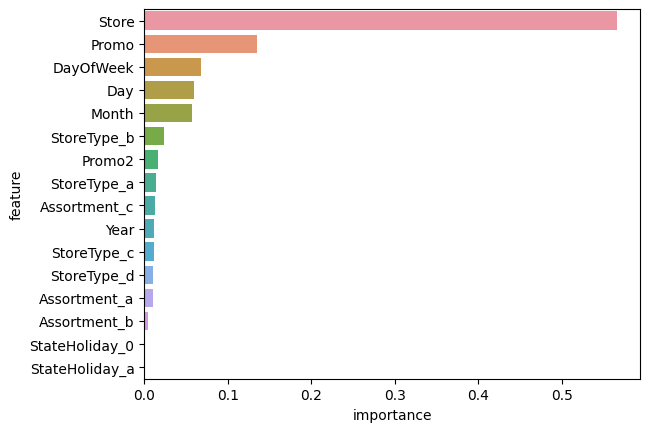

In [31]:
# Plot to visualize most important feature
sns.barplot(data=feature_importance_df, x='importance', y='feature')